In [1]:
## Load in the data
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import time
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
%matplotlib inline

G:\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
## Data file format
# column 1 = seconds
# column 2 = mic (trachea)
# column 3 = abdominal movement (stretch sensor)
# column 4 = thorax movement (stretch sensor)
# Sample rate: 1Khz. 
data=['seconds','mic (trachea)','abdominal movement (stretch sensor)','thorax movement (stretch sensor)']

In [3]:
## Data file format of Overnight_3 file
# column 1 = seconds
#column 2 = thorax movement (stretch sensor)
#column 3 = abdominal movement (stretch sensor)
#column 4 = mic (right of trachea)
#column 5 = mic 2 (left of trachea)
#column 6 = mic 3 (trachea)

##Sampling frequency of 1kHz. Data recorded overnight during sleep using a USB DUX D board.
data_test=['seconds','thorax movement (stretch sensor)','abdominal movement (stretch sensor)','mic (right of trachea)','mic 2 (left of trachea)','mic (trachea)',]

To Load files and create a zip file we need below:

In [9]:


# could be any of the four files available
# overnight_1
# overnight_2
# overnight_3
# mictest
# mictest_and_abdo

# this is quite slow... (note this could be made faster by opening and rewriting to 
# a compressed numpy file using np.savez_compressed() and reloading that each time
# instead)
start_time = time.clock()

overnight_1 = np.loadtxt('overnight_1/sleep_data.dat', delimiter=' ')
overnight_2 = np.loadtxt('overnight_2/sleep_data2.dat', delimiter=' ')
overnight_3 = np.loadtxt('overnight_3/test_during_sleep.dat', delimiter=' ')

print(time.clock() - start_time, "seconds")

In [10]:
print(overnight_1.shape)
seconds = overnight_1[:,0]
mic = overnight_1[:,1]
abdominalMovement = overnight_1[:,2]
thoraxMovement = overnight_1[:,3]

(11044514, 4)


In [39]:

#y=pd.concat(overnight_1,overnight_2)
#print(y)

print(seconds[:60])


[0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011
 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023
 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035
 0.036 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047
 0.048 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059]


(11044514,)


In [18]:
np.savez_compressed('overnight_all_compressed',overnight_1,overnight_2,overnight_3)

In [24]:
x = np.load('overnight_all_compressed.npz')


In [19]:
print(x['arr_2'])

[[0.0000000e+00 1.2593080e+00 1.1172730e+00 2.5576240e+00 1.2473050e+00
  1.2413030e+00]
 [1.0000000e-03 1.2613080e+00 1.1152720e+00 2.5496230e+00 1.2933160e+00
  1.2773120e+00]
 [2.0000000e-03 1.2573070e+00 1.1152720e+00 2.2015370e+00 1.2212980e+00
  1.2773120e+00]
 ...
 [1.5437775e+04 1.3293240e+00 1.2493050e+00 2.6336430e+00 1.2413030e+00
  1.2132960e+00]
 [1.5437776e+04 1.3293240e+00 1.2493050e+00 2.7476710e+00 1.2673090e+00
  1.2553060e+00]
 [1.5437777e+04 1.3313250e+00 1.2513050e+00 2.6636500e+00 1.2232990e+00
  1.2313010e+00]]


In [25]:
#import time
start_time = time.clock()
#for files in x:
overnight_file1 = pd.DataFrame(x['arr_0'], columns = data)
overnight_file2 = pd.DataFrame(x['arr_1'], columns = data)
overnight_file3 = pd.DataFrame(x['arr_2'], columns = data_test)
print(time.clock() - start_time, "seconds")

11.042743467354512 seconds


In [7]:
overnight_file1[:2]

,seconds,mic (trachea),abdominal movement (stretch sensor),thorax movement (stretch sensor)
0,0.000,1.279312,2.073506,1.995487
1,0.001,1.215297,2.075507,1.997488


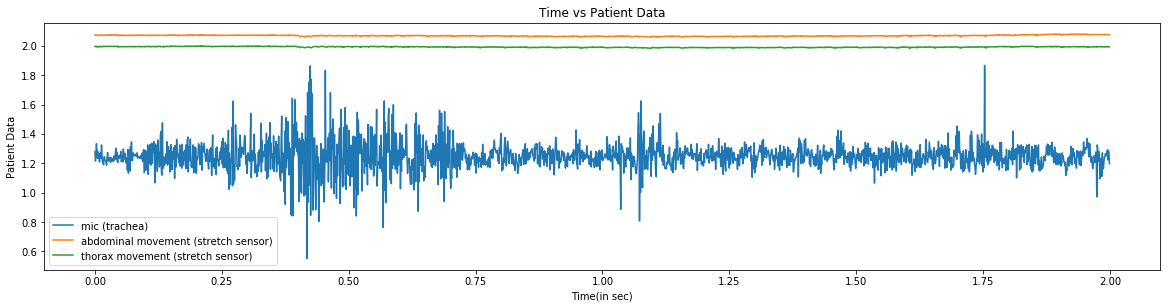

In [33]:
fig = plt.figure(figsize=(20,10))
#for ix,items in zip([1,2],x):
ax = fig.add_subplot(2,1,ix)
ax.set_title('Time vs Patient Data')
ax.set_xlabel('Time(in sec)')
ax.set_ylabel('Patient Data')
ax.plot(overnight_file1['seconds'][:2000],overnight_file1['mic (trachea)'][:2000],label='mic (trachea)')
ax.plot(overnight_file1['seconds'][:2000],overnight_file1['abdominal movement (stretch sensor)'][:2000],label='abdominal movement (stretch sensor)')
ax.plot(overnight_file1['seconds'][:2000],overnight_file1['thorax movement (stretch sensor)'][:2000],label='thorax movement (stretch sensor)')

ax.legend()



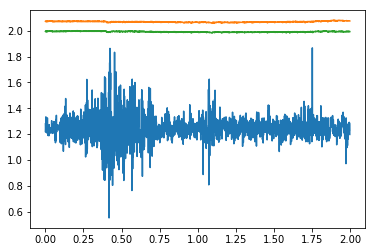

In [25]:
# plot first two seconds
plt.plot(overnight_1[:2000, 0], overnight_1[:2000, 1:])

In [6]:
X_train = overnight_file1[['mic (trachea)', 'abdominal movement (stretch sensor)']]

In [ ]:
model = sm.OLS(overnight_file1['thorax movement (stretch sensor)'], X_train).fit()
sns.residplot(model.fittedvalues, overnight_file1['thorax movement (stretch sensor)'], lowess=True, line_kws={'color':'r', 'lw':1})
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals');
model.summary()

Check the P values and residual plot with all the features to understand data distribution

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

series = overnight_file1[['mic (trachea)']]
plot_acf(series,lags=500)
pyplot.show()

In [7]:
#Plot graph based on time interval

def plotOvernightData(interval,start):
    samplingFrequency=1000
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1,1,1)
    ax.set_title('Time vs Patient Data')
    ax.set_xlabel('Time(in sec)')
    ax.set_ylabel('Patient Data')
    ax.plot(overnight_file1['seconds'][start*samplingFrequency:samplingFrequency*(start+interval)],overnight_file1['mic (trachea)'][start*samplingFrequency:samplingFrequency*(start+interval)],label='mic (trachea)')
    ax.plot(overnight_file1['seconds'][start*samplingFrequency:samplingFrequency*(start+interval)],overnight_file1['abdominal movement (stretch sensor)'][start*samplingFrequency:samplingFrequency*(start+interval)],label='abdominal movement (stretch sensor)')
    ax.plot(overnight_file1['seconds'][start*samplingFrequency:samplingFrequency*(start+interval)],overnight_file1['thorax movement (stretch sensor)'][start*samplingFrequency:samplingFrequency*(start+interval)],label='thorax movement (stretch sensor)')

    ax.legend()

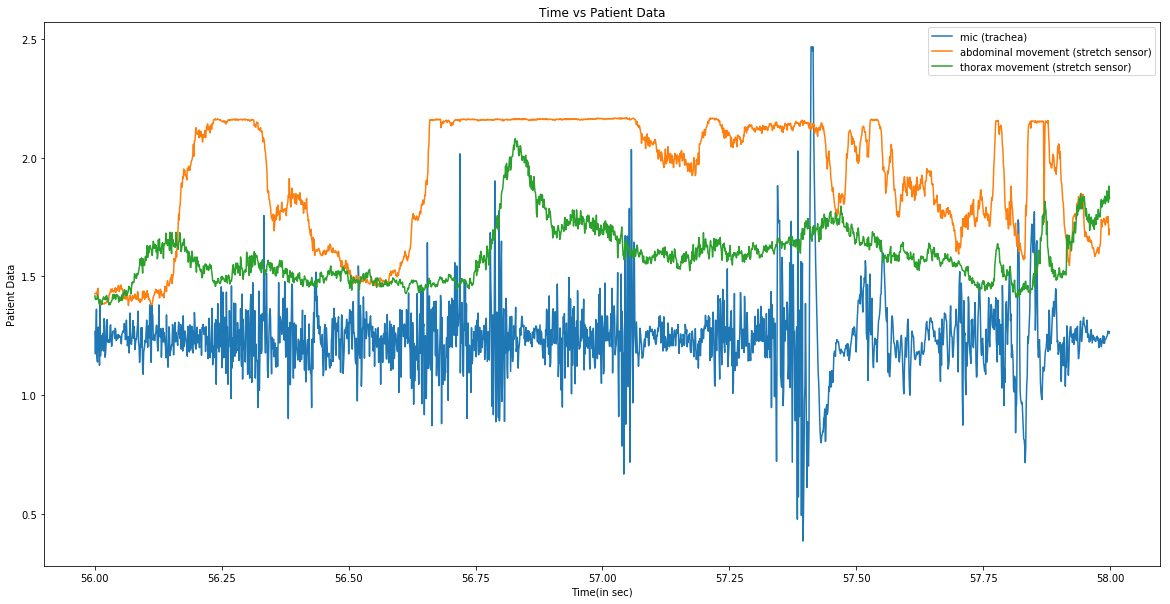

In [9]:
plotOvernightData(2,56)

In [16]:
#overnight_file1.iloc[:,1:3]

In [26]:
overnight_file1.shape[0]//1000

11044

In [7]:
samplingFrequency=1000
y=np.arange(11044,3)
x=np.arange(11045)
for i in range(1,overnight_file1.shape[0]//100000):
    x=np.vstack(np.mean(overnight_file1.iloc[i:samplingFrequency*i,1:4]))
    np.vstack([y,x])
    
    
    
   
print((y))

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [26]:
overnight_file1 = overnight_file1.values()


TypeError: 'numpy.ndarray' object is not callable

In [15]:
overnight_file1 = overnight_file1.values()

overnight_file1= np.array(x['arr_0'],dtype=('')


samplingFrequency=1000
y=np.arange(11044,3)
x=np.arange(1,3)
for i in range(1,overnight_file1.shape[0]//100000):
    x=(np.mean(overnight_file1[i:samplingFrequency*i,1:4]))
    print(x)
    np.hstack([x,y])
    #np.vstack([y,x])
    
    
    
   
print(y)

SyntaxError: invalid syntax (<ipython-input-15-6ee428986df5>, line 5)

In [38]:

def plotOvernightData():
    samplingFrequency=1000
    x=np.arange(11045)
    y=[]
    for i in range(1,overnight_file1.shape[0]//10000):
        y.append(np.mean(overnight_file1.iloc[i:samplingFrequency*i,1:4]))
        print(len(y))
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1,1,1)
    ax.set_title('Time vs Patient Data')
    ax.set_xlabel('Time(in sec)')
    ax.set_ylabel('Patient Data')
    ax.plot(x,y[1],label='mic (trachea)')
    ax.plot(x,y[2],label='abdominal movement (stretch sensor)')
    ax.plot(x,y[3],label='thorax movement (stretch sensor)')

    ax.legend()

In [39]:
plotOvernightData()

TypeError: append() takes no keyword arguments

In [ ]:


def plotOvernightData(interval,start):
    samplingFrequency=1000
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1,1,1)
    ax.set_title('Time vs Patient Data')
    ax.set_xlabel('Time(in sec)')
    ax.set_ylabel('Patient Data')
    ax.plot(overnight_file1['seconds'][start*samplingFrequency:samplingFrequency*(start+interval)],overnight_file1['mic (trachea)'][start*samplingFrequency:samplingFrequency*(start+interval)],label='mic (trachea)')
    ax.plot(overnight_file1['seconds'][start*samplingFrequency:samplingFrequency*(start+interval)],overnight_file1['abdominal movement (stretch sensor)'][start*samplingFrequency:samplingFrequency*(start+interval)],label='abdominal movement (stretch sensor)')
    ax.plot(overnight_file1['seconds'][start*samplingFrequency:samplingFrequency*(start+interval)],overnight_file1['thorax movement (stretch sensor)'][start*samplingFrequency:samplingFrequency*(start+interval)],label='thorax movement (stretch sensor)')

    ax.legend()